In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [317]:
db=np.load("proyecto_training_data.npy")
df=pd.DataFrame(db)
df

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [318]:
df.columns=["a","b","c","d","e","f"]
df

,a,b,c,d,e,f
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [319]:
stats=df.describe(include='all')
stats

,a,b,c,d,e,f
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [320]:
M=stats.loc["max"]-stats.loc['min']
Rango=pd.DataFrame([M],index=['Rango'])
pd.concat([stats,Rango])

,a,b,c,d,e,f
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000
Rango,720100.000000,9.000000,4358.000000,12.000000,138.000000,292.000000


In [321]:
r2=df.corr('pearson',numeric_only=True)
r2
    

,a,b,c,d,e,f
a,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
b,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
c,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
d,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
e,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
f,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


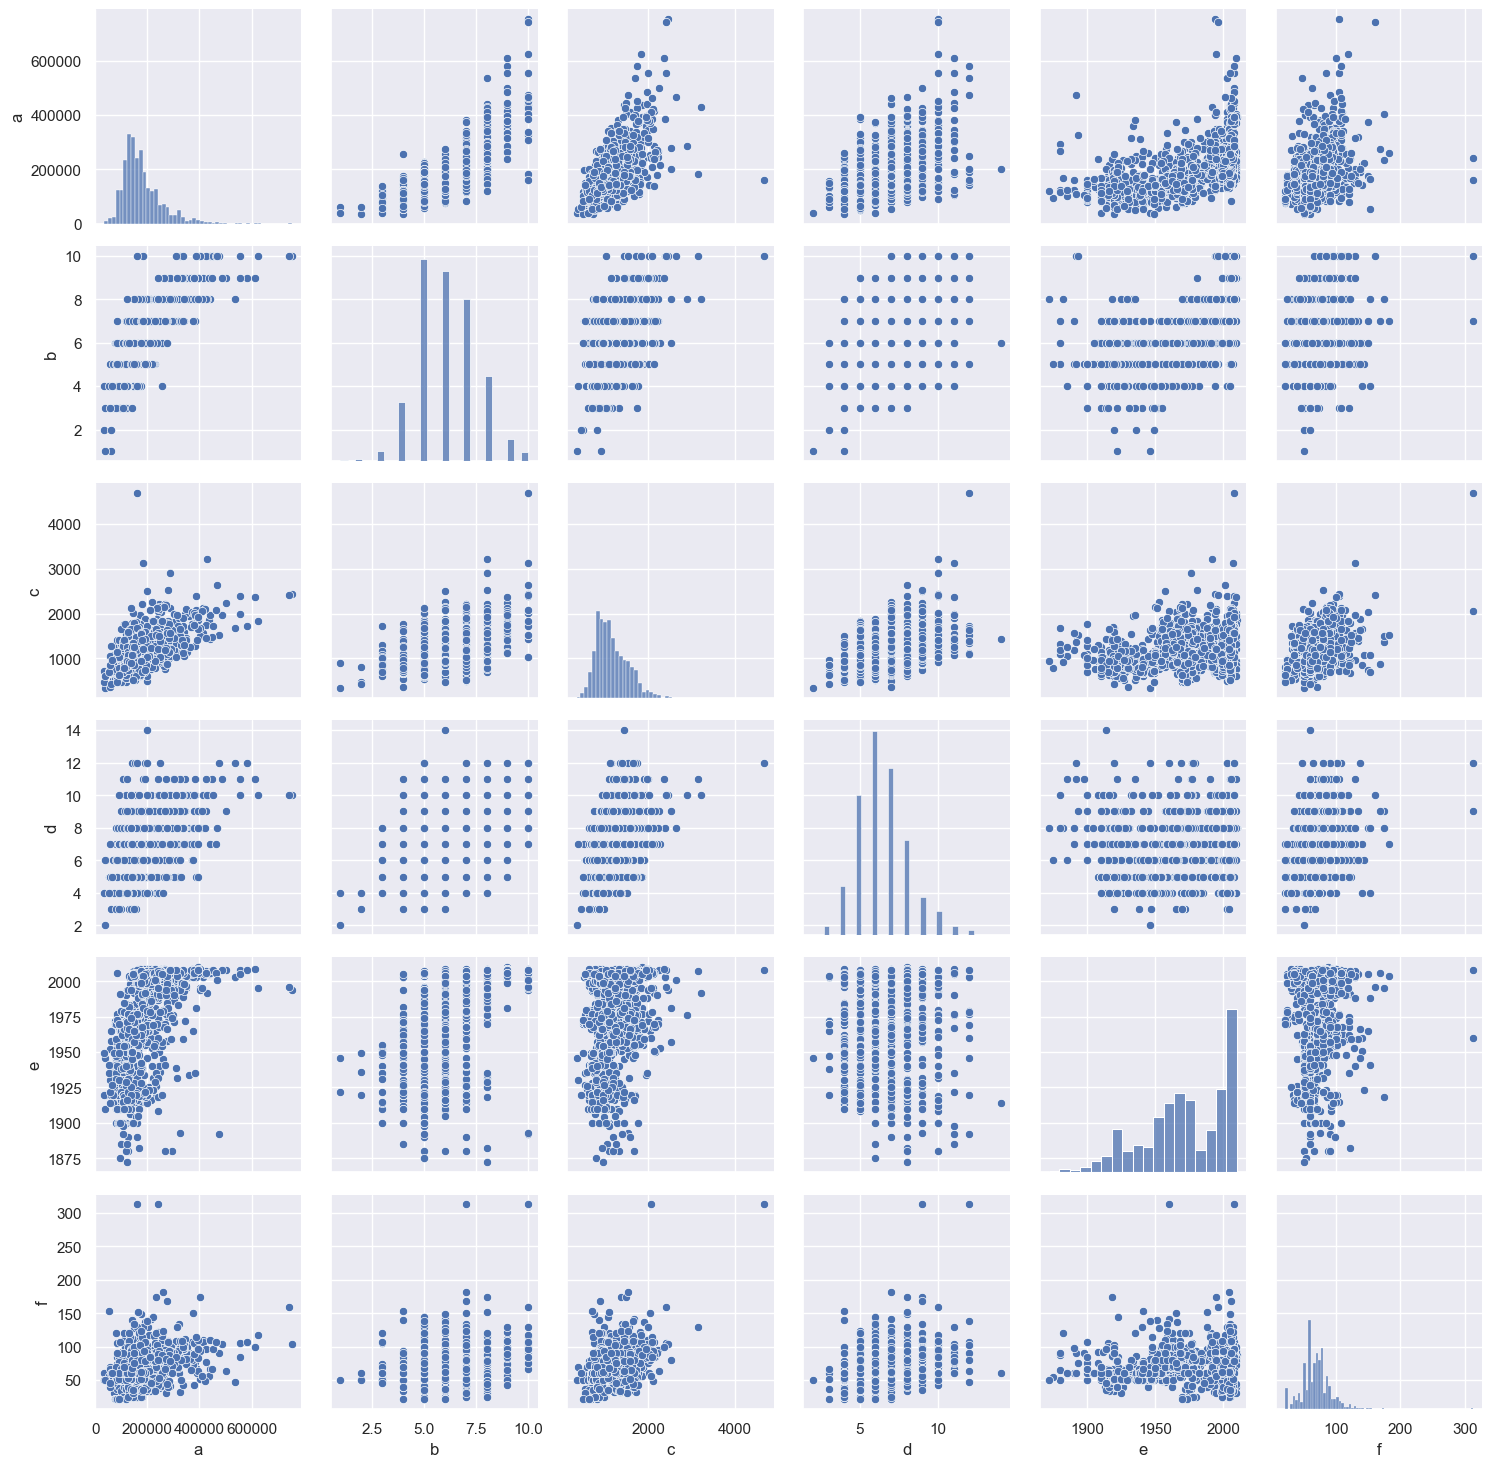

In [322]:
import seaborn as sns
sns.set_theme()
G=sns.PairGrid(df,dropna=True)
G.map_diag(sns.histplot)
G.map_offdiag(sns.scatterplot)


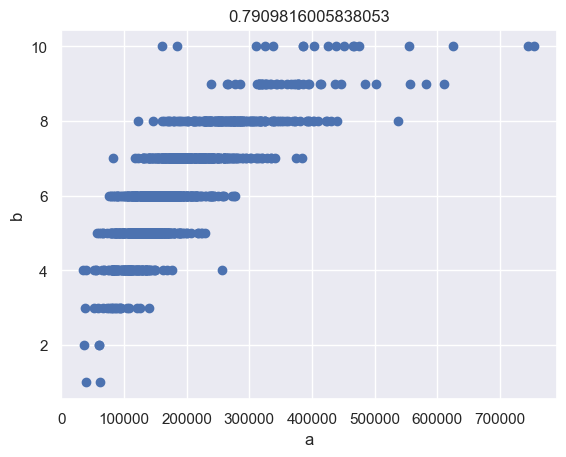

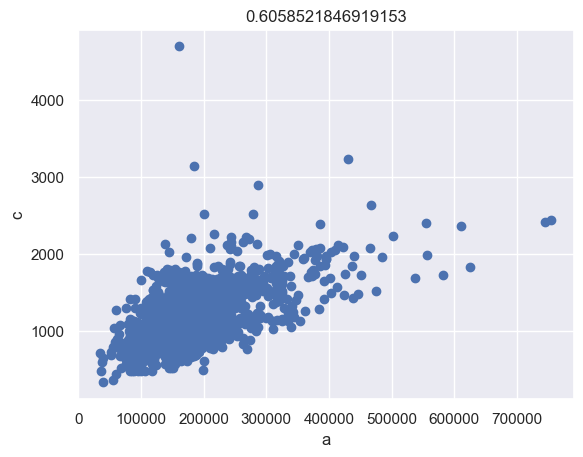

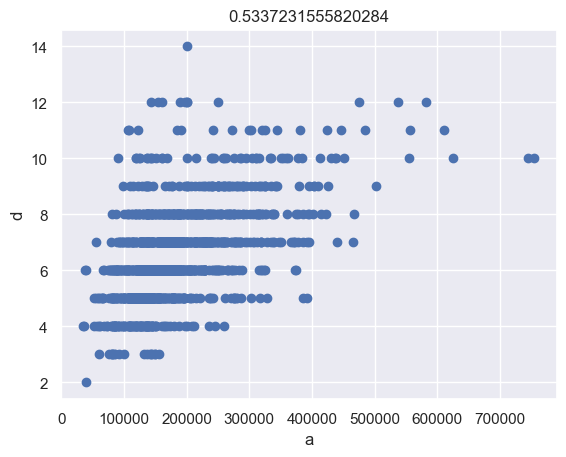

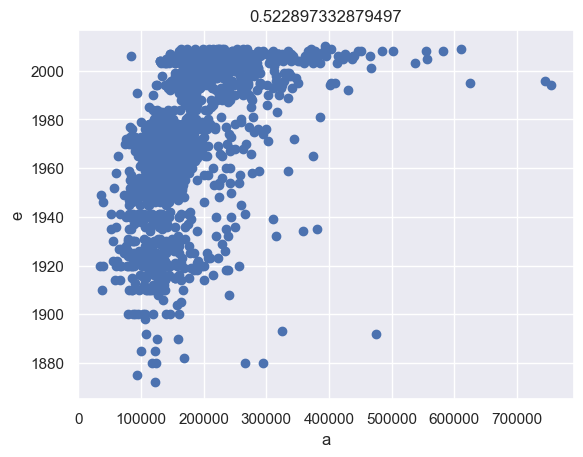

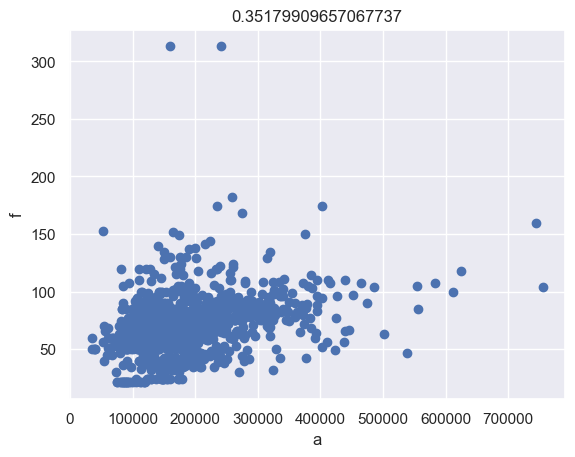

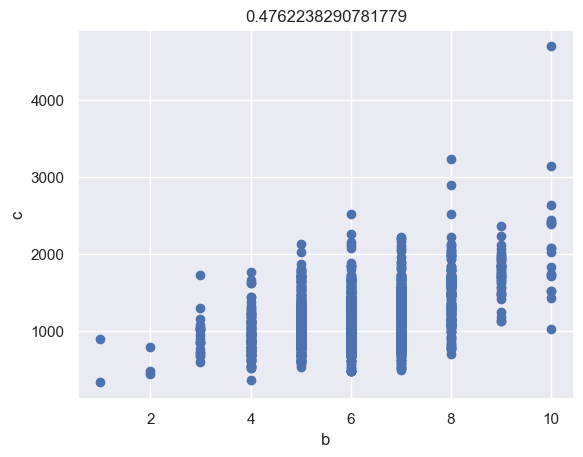

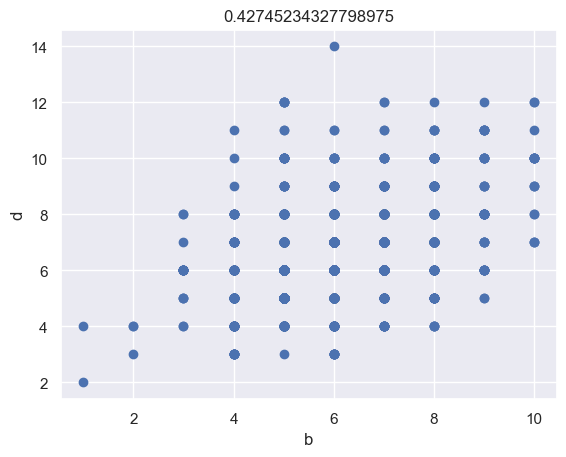

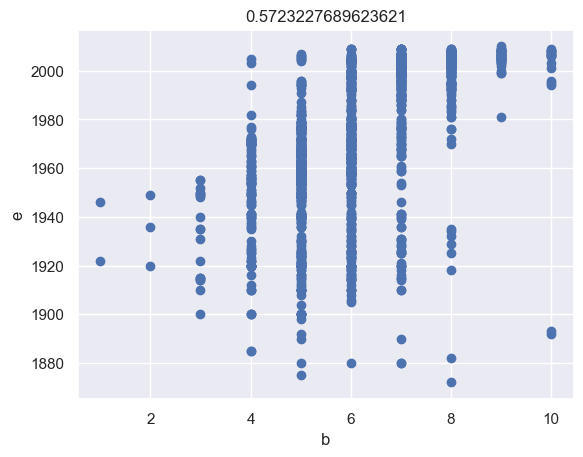

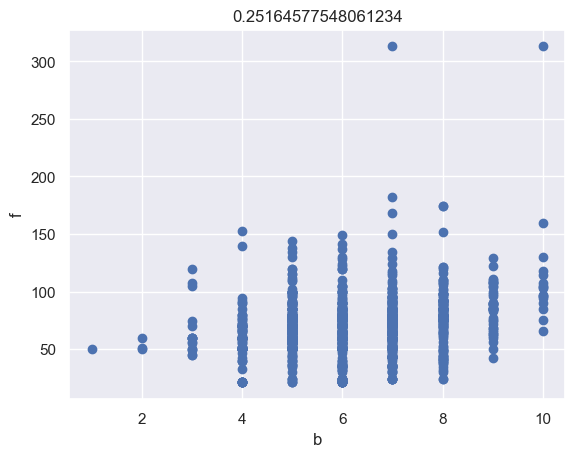

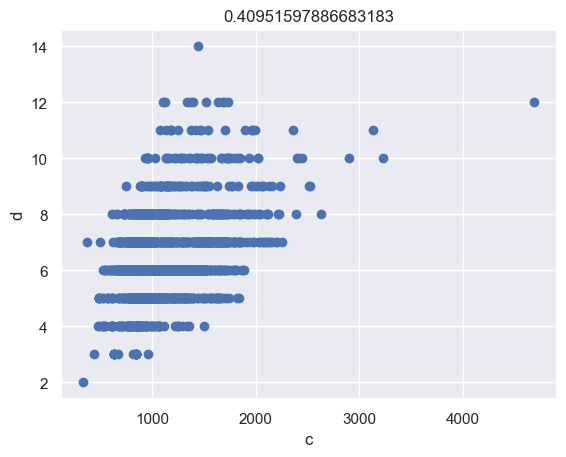

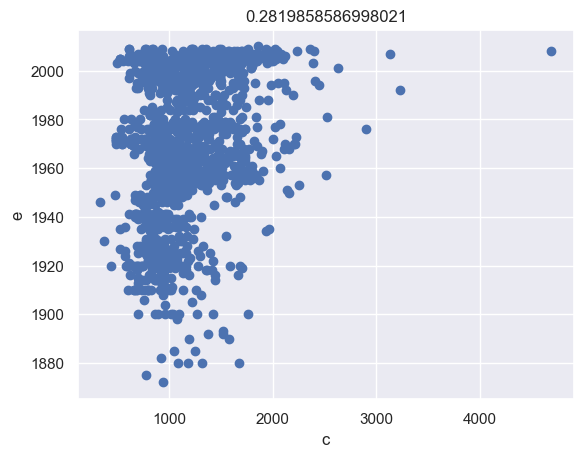

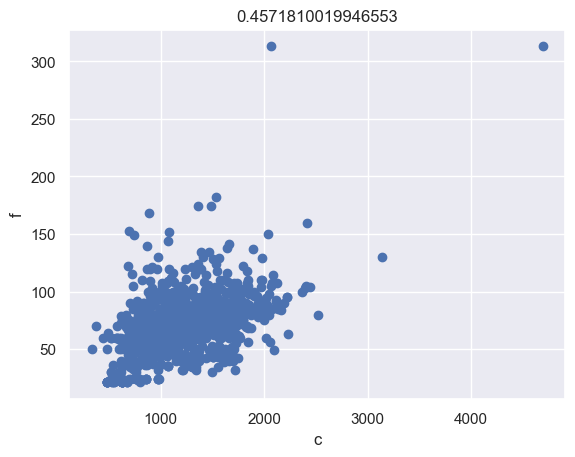

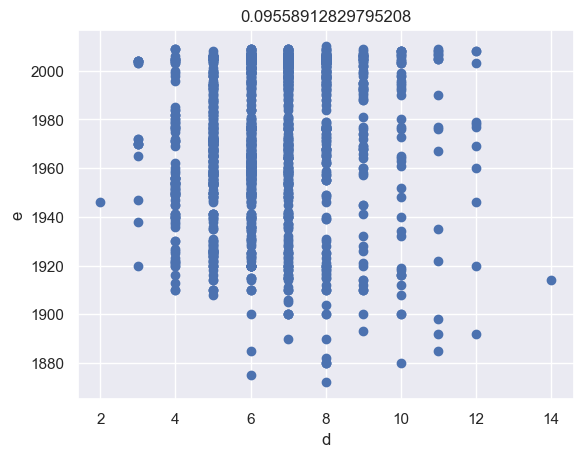

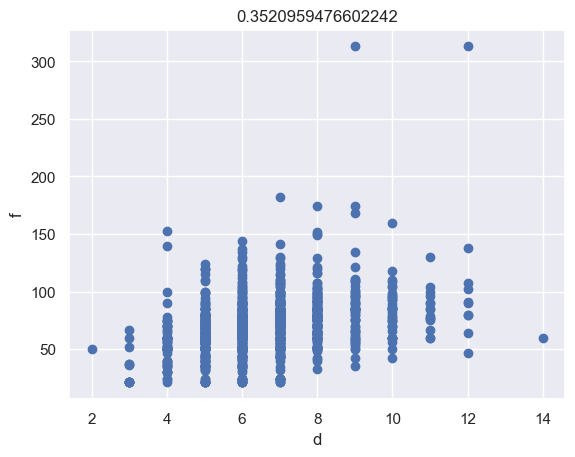

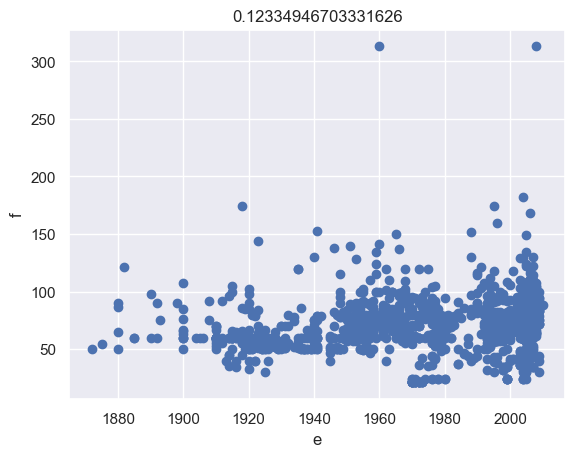

In [323]:
from itertools import combinations

variables=df.columns
Rels=pd.DataFrame(combinations(variables,2))
rtitle=[]
figures = [plt.figure() for _ in range(15)]
for i, fig in enumerate(figures):
    x1=Rels.iloc[i].iloc[0]
    x2=Rels.iloc[i].iloc[1]
    ax = fig.add_subplot(111)
    ax.scatter(df[x1],df[x2])
    ax.set_title(r2[x1][x2])
    ax.set_xlabel(x1)
    ax.set_ylabel(x2)


In [324]:
ma=stats['a']['mean']
mb=stats['b']['mean']
mc=stats['c']['mean']
m0=mc/ma



In [325]:
class Modelo_lineal():
    
    Ei=np.array([])
    x=[]
    y=[]
    Model={}
    
    @classmethod
    def Training(cls,x,y,epochs,err_int,alpha):
    
        #toma los vectores introducidos y se asegura que sean np.array
        cls.x=np.array(x)
        cls.y=np.array(y)
        print(cls.x)
        #Almacena variables de utilidad
        n=x.size
        a=alpha
        It=epochs
        #crea una matriz x,ones vertical y horizontal
        xv=cls.x.reshape(-1,1)
        v1=np.ones_like(xv)
        Vx=np.hstack([xv,v1])
        Hx=np.transpose(Vx)
        #Define los parámetros iniciales B1 y B0 y crea la matrix B
        B0=0
        B1=m0
        VB=np.array([B1,B0])
        #crea matriz para almacenar errores y matriz de iteración de B 
        cls.Ei=np.array([])
        Bi=VB
        cls.Model={}
        
        for i in range(It+1):
            Vy=np.matmul(Vx,Bi)
            Dy=(y-Vy)
            e=(1/(2*n))*np.sum(Dy**2)
            eB=np.matmul(Hx,-Dy)
            Mi=np.append(Bi,e)
            cls.Ei=np.append(cls.Ei,e)
            cls.Model[i]=Mi
            Bi=Bi-(a*eB)
        EP=np.arange(0,It,err_int)
        print(f'Convergencia del error: {cls.Ei[EP]}')
    
    @classmethod
    def Error_Plot(cls):
        plt.plot(cls.Ei)
        plt.xlabel('Iteraciones')
        plt.ylabel('Error')

    @classmethod
    def Plot_Modelo(cls,step):
        n=len(cls.Model)
        I=np.arange(step,n,step,)
        mn=np.min(Modelo_lineal.x)
        mx=np.max(Modelo_lineal.x)
        xi=np.linspace(mn,mx,10,endpoint=True)
        figures = [plt.figure() for _ in range(I.size)]
        for i, fig in enumerate(figures):
            ax = fig.add_subplot(111)
            yi=xi*cls.Model[I[i]][0]+cls.Model[I[i]][1]
            lbl='y='+str(cls.Model[I[i]][0])+'x+'+str(cls.Model[I[i]][1])
            ax.scatter(cls.x,cls.y)
            ax.plot(xi,yi,label=lbl)
            ax.legend()
            ax.set_title(f'Iteración {I[i]}')
            
                
  
    

In [333]:
Modelo_lineal.Training(df['a'],df['c'],200,10,0.000000000000001)

[208500. 181500. 223500. ... 266500. 142125. 147500.]
Convergencia del error: [85407.46007338 81150.81869001 79834.60772956 79427.61753784
 79301.77067801 79262.8571305  79250.82453636 79247.10389576
 79245.95342337 79245.59768168 79245.48768145 79245.45366778
 79245.4431502  79245.43989791 79245.43889216 79245.43858106
 79245.43848476 79245.43845488 79245.43844554 79245.43844254]


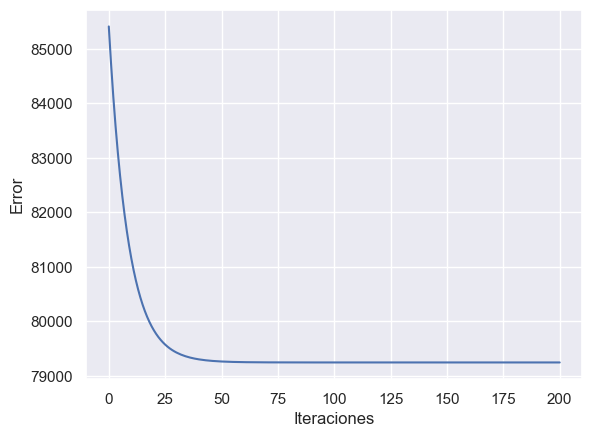

In [334]:
Modelo_lineal.Error_Plot()

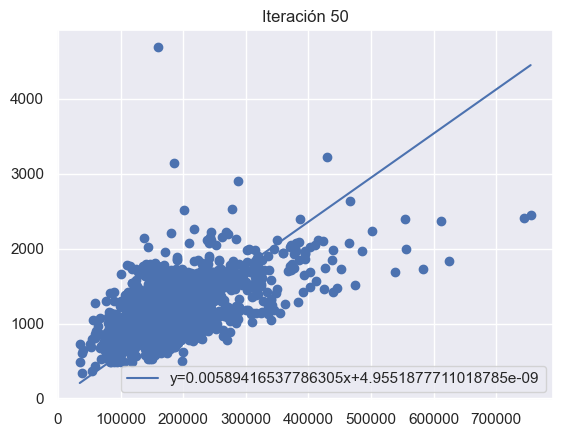

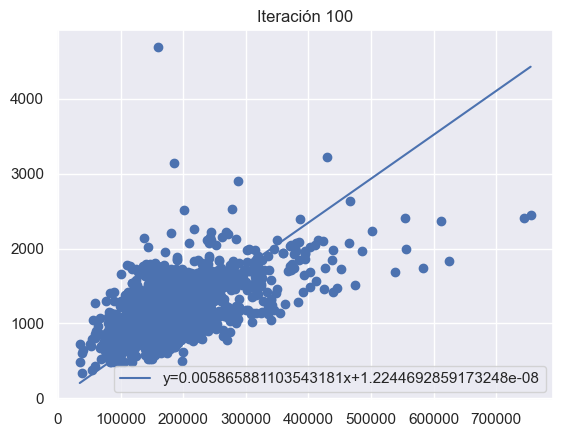

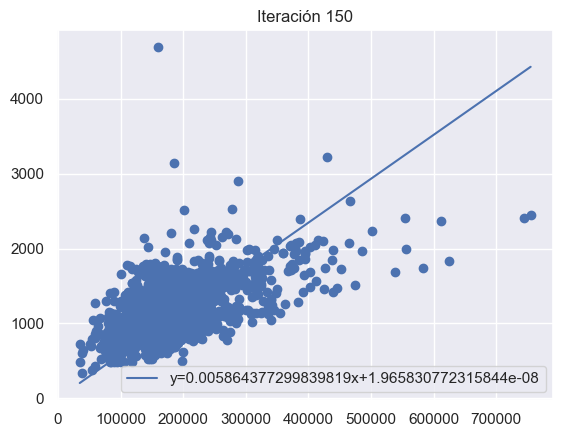

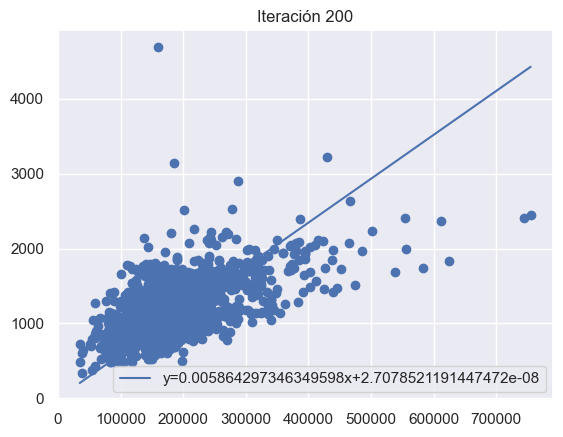

In [ ]:
Modelo_lineal.Plot_Modelo(50)

In [336]:
pip install sklearn.linear_model

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.linear_model (from versions: none)
ERROR: No matching distribution found for sklearn.linear_model


In [ ]:
def Plot_Modelo(Mod,step):
    global show
    n=len(Mod)
    I=np.arange(step,n,step)
    show=pd.DataFrame(Mod)
    show=show[I].set_axis(['B1','B0','Error'],axis='index')
    show
    
    
        

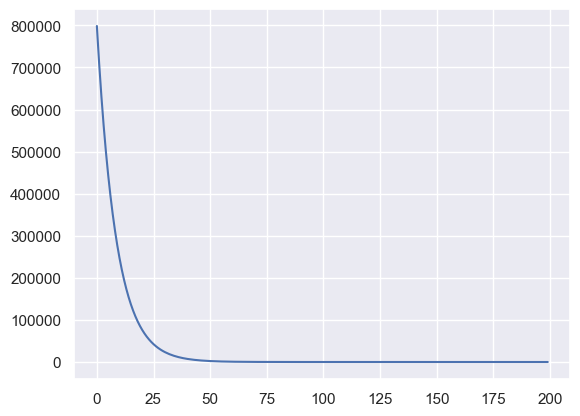

In [ ]:
 Modelo_lineal.Error_Plot()

In [ ]:
Plot_Modelo(Model,10)


In [ ]:
Modelo_lineal.Plot_error(Modelo_lineal.Ei)

AttributeError: type object 'Modelo_lineal' has no attribute 'Plot_error'

In [ ]:
x=[1,10]
Ei[x]

array([84725.04103561, 81150.81869001])

In [ ]:
x=np.array(df['c'])
x=np.array(x)
xv=x.reshape(-1,1)
v1=np.ones_like(xv)
Vx=np.hstack([xv,v1])
Hx=np.vstack([[xv],[v1]])
B0=0
B1=100
VB=np.array([B1,B0])
Ei=np.array([])
print(Vx,VB)
Vy=np.matmul(Vx,VB)
Vy
n=x.size
print(n)
y=np.array(df['a'])
Dy=(y-Vy)
n=Dy.size
e=(1/(2*n))*np.sum(Dy**2)
eB=np.matmul(Dy,Hx)
print(eB)
a=0.000005
Bi=VB-a*eB[:,0]
print(f'Bi es ahora{Bi}')
Model={}
Mi=np.append(Bi,e)
Model[i]=Mi
Mi


[[8.560e+02 1.000e+00]
 [1.262e+03 1.000e+00]
 [9.200e+02 1.000e+00]
 ...
 [1.188e+03 1.000e+00]
 [1.078e+03 1.000e+00]
 [1.256e+03 1.000e+00]] [100   0]
1460
[[1.15095946e+11]
 [9.44014460e+07]]
Bi es ahora[-5.75379731e+05 -4.72007230e+02]


array([-5.75379731e+05, -4.72007230e+02,  4.13110692e+09])